<a href="https://colab.research.google.com/github/ManJ-PC/HelloCodeSchoolProject/blob/master/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Criar um classificador binário de imagens utilizando Keras e Tensorflow.

Para isso deixo ao teu critério escolheres 2 classes para construir o classificador.
Como dataset para treino usa 70% do dataset, 20% para test e 10% para validação.

Parafraseando este [artigo](https://https://repositorio-aberto.up.pt/bitstream/10216/129193/2/418655.pdf): "A validação em machine learning é o processo de avaliar um modelo treinado num conjunto de
dados de teste de modo a estimar a sua capacidade de generalização em novos contextos. Assim,
permite identificar situações como o sobreajuste (do inglês overfitting), na qual um modelo está
demasiado adaptado aos dados de treino. Geralmente os dados são divididos em três partes: treino,
validação e teste. Pela mesma ordem, estes são usados para o treino do modelo, ajuste dos hiperparâmetros, e na avaliação imparcial do modelo final. Este método de separação é denominado de
validação cruzada holdout."

In [1]:
pip install Pillow

In [2]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


In [3]:
import tensorflow as tf
import numpy as np
import PIL.Image as PImage
import matplotlib.pyplot as plt

IMAGE_RES = 224  # resize das imagens para correrem na imagenet 224 linhas,224 colunas,3 canais
batch_size=4

# Load Mobilenet model



In [4]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet') # Rede pré-treinada, estrutura da MobileNet2 (tem mil classes)
model.summary()

14548992/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

819200/806107 [==============================] - 0s 0us/step


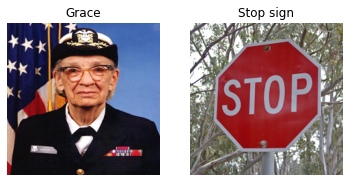

In [5]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

image_path = tf.keras.utils.get_file('grace_hopper.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
image1 = PImage.open(image_path).resize((IMAGE_RES, IMAGE_RES))
image_path = tf.keras.utils.get_file('STOP.jpg', 'https://upload.wikimedia.org/wikipedia/commons/f/f9/STOP_sign.jpg')
image2 = PImage.open(image_path).resize((IMAGE_RES, IMAGE_RES))

plt.subplot(1,2,1)
plt.imshow(image1)
plt.axis('off')
_ = plt.title("Grace")

plt.subplot(1,2,2)
plt.imshow(image2)
plt.axis('off')
_ = plt.title("Stop sign")

plt.show()

# Make a test batch

In [6]:
x1 = np.array(image1) #matriz 4D ao invês de 3D,  dou a primeira img, pacote de imagens para a rede. 1º el. 1a img, 2ºel. 2a img 
x2 = np.array(image2) #batch o conj. das duas iamgens
print("x1.shape:", x1.shape)
print("x1.shape:", x1.shape)
x=np.zeros( (2,IMAGE_RES, IMAGE_RES, 3)) # 2 elementos
#x = x1[np.newaxis, ...]
x[0] = x1 # 1st batch item 
x[1] = x2 # 2nd batch item

print("batch shape", x.shape)
#x = x / 255.0
x = x / 255.0 # rede treinada com píxeis, entre -1 e 1 ... adjusts: pass values between [0, 255] to [-1,1], 3 canais destes píxeis
x = x * 2.0
x = x - 1.0

x1.shape: (224, 224, 3)
x1.shape: (224, 224, 3)
batch shape (2, 224, 224, 3)


#Use the model to predict classes

In [7]:
result = model.predict(x) # parameter: batch
print(result.shape) # cada um dos resultaados são mil probabilidades!
predicted_class1 = np.argmax(result[0], axis=-1) # class position most probable for img1
print("predicted_class1:", predicted_class1)
predicted_class2 = np.argmax(result[1], axis=-1)
print("predicted_class2:", predicted_class2)

predicted_class_name1 = imagenet_labels[predicted_class1+1]
print("predicted_class_name1:", predicted_class_name1)
predicted_class_name2= imagenet_labels[predicted_class2+1]
print("predicted_class_name2:", predicted_class_name2)

(2, 1000)
predicted_class1: 652
predicted_class2: 919
predicted_class_name1: military uniform
predicted_class_name2: street sign


# Custom Image Classifier

In [8]:
import fastai
fastai.__version__

'1.0.61'

In [9]:
from fastai import *
from fastai.vision import *

In [10]:
 from google.colab import drive
 drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [11]:
# from google.colab import auth
# auth.authenticate_user()

In [12]:
# with open('/content/gdrive/MyDrive/') as f:
#   ('Hello Google Drive!')
# !cat /content/gdrive/MyDrive/

path=Path('/content/gdrive/Shareddrives/Datasets')
print(path)


/content/gdrive/Shareddrives/Datasets


In [13]:
import os
#os.chdir("/content/gdrive/MyDrive/ColabNotebooks")
os.chdir("/content/gdrive/Shareddrives/Datasets")
!ls


Beagle	models	Pinscher


In [14]:
classes= ['Beagle','Pinscher']
# breed = bool(input('For Beagle choose 0, for Pinscher choose 1'))
#os
#path=!pwd


In [15]:
# def create_folder():
#   path = Path('/Beagle/')
for c in classes:
  print(c)
  verify_images(path/c,delete=True, max_size=400)

Beagle
Pinscher


In [16]:
#!cd Beagle;ls

In [17]:
from fastai.vision.transform import get_transforms
from fastai.vision.data import ImageDataBunch
print(path)
np.random.seed(42)
#batch_size = 24
data = ImageDataBunch.from_folder(path, train='./', valid_pct=0.2,ds_tfms=get_transforms(),bs=4, size=224, num_workers=2).normalize(imagenet_stats)

/content/gdrive/Shareddrives/Datasets


/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 


In [18]:
data.classes

['Beagle', 'Pinscher']

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

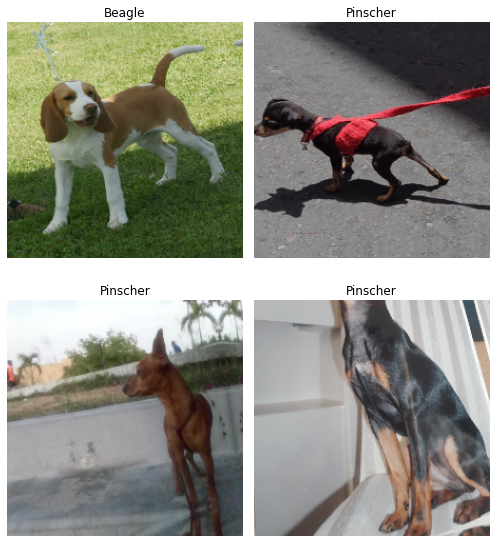

In [19]:
data.show_batch(rows=2, figsize=(7,8))

Creating a new model

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.496493,0.245996,0.250000,00:11
1,0.518631,0.045577,0.000000,00:08
2,0.465084,0.038860,0.000000,00:07
3,0.334899,0.028047,0.000000,00:07


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [22]:
learn.save('stage-1')

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [25]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.041085,0.014844,0.000000,00:10
1,0.096827,0.020426,0.000000,00:11


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

Interpretation

In [26]:
from fastai.train import ClassificationInterpretation
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

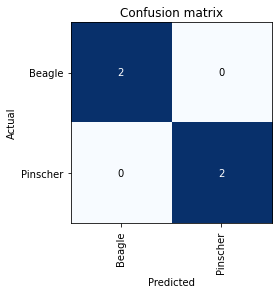

In [27]:
interp.plot_confusion_matrix()

# Validation

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [29]:
# pip install kaggle
# mkdir ~/.kaggle
# cp kaggle.json ~/.kaggle/
# ls -l
# #chmod 600 ~/.kaggle/kaggle.json
# #kaggle competi

In [30]:
# kfold=KFold(n_splits=5)

In [31]:
# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegression

# iris = load_iris()
# logreg = LogisticRegression()

In [32]:
# print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

In [33]:
# type(iris.data)

In [34]:
# scores = cross_val_scores(model. )


In [35]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels='inferred', # inferred from structure of te subfolders in alpabetical order
    label_mode='int', # most common but can be also categorical, binary
    # class_name = ['0', '1', '2', '3', ...]
    color_mode='rgb', #'grayscale', 
    batch_size= batch_size, 
    image_size = (IMAGE_RES, IMAGE_RES), # reshape if not in this size
    shuffle=True, # to obtain in randomize order
    seed=123, # is important set the seed, to obtain same validation and training set every time that we running!
    validation_split=0.2,
    subset="training",
)

Found 20 files belonging to 3 classes.
Using 16 files for training.


In [36]:
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels='inferred', # inferred from structure of te subfolders in alpabetical order
    label_mode='int', # most common but can be also categorical, binary
    # class_name = ['0', '1', '2', '3', ...]
    color_mode='grayscale', #'rgb', 
    batch_size= batch_size, 
    image_size = (IMAGE_RES, IMAGE_RES), # reshape if not in this size
    shuffle=True, # to obtain in randomize order
    seed=123, # is important set the seed, to obtain same validation and training set every time that we running!
    validation_split=0.1,
    subset="validation",
)

Found 20 files belonging to 3 classes.
Using 2 files for validation.


In [37]:
# def augment(x,y):
#   img = tf.image.random_brightness(x, max_delta=0.05)
#   return img, y

In [38]:
# ds_train = ds_train.map(augment)

In [39]:
# from tensorflow.keras.optimizers import Adam
# import keras
# import keras.utils
# from keras import utils as np_utils
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# import tensorflow as tf 



In [40]:
# # Custom Loops
# for epochs in range(10):
#   for x, y in ds_train:
#     # train here
#     pass

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss=[
#           keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     ],
#     metrics=["accuracy"],
# )

# model.fit(ds_train, epochs=10, verbose=2)

In [41]:
class_names = ds_train.class_names
print(class_names)

['Beagle', 'Pinscher', 'models']


Visualize the data

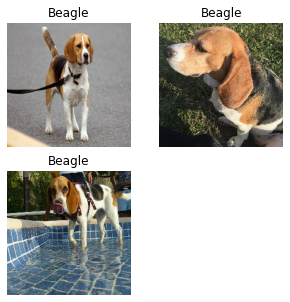

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in ds_train.take(1):
  for i in range(3):
    ax = plt.subplot(2, 2, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [43]:
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(4, 224, 224, 3)
(4,)


Standardize the data

In [44]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [45]:
normalized_ds = ds_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_bath = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


Configure the dataset for performance

In [47]:
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE)
ds_validation  = ds_validation.cache().prefetch(buffer_size=AUTOTUNE)


In [57]:
num_classes=2 #confere?
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
  ])

In [58]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [59]:
model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=3
)

Epoch 1/3
4/4 [==============================] - ETA: 0s - loss: 0.9811 - accuracy: 0.3125

ValueError: ignored

In [ ]:
!pwd

In [ ]:
!ls